# Business Case: Yulu - Hypothesis Testing

## About Yulu:

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to
eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo
and sustainable commuting. Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces,
residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient! Yulu has recently suffered
considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these
shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in
the Indian market.

## Business Problem:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

## Problem Statement:

* Relation between the dependent and independent variable
* Bivariate:
 * Dependance of count on weathe
 * Dependance of count on season
 * Depandance of count on windspeed
 * Depandance of count in days
 * Depandance of count in month
 * Depandance of count in year
 * Count of users in each humidity level
* Multivariate
  * Season : Count : Year
 * Season : casual : Year
 * Season : registered : Year
 * Season : temp : month
 * Season : count : month
 * Season : windspeed : month
 * workingday : count : weather
 * Season : humidity : workingday
 * Season:Humidity: Month
 * Season : registered : Year
* Chisquare:
  * Weather is dependent on the season :Chisquare
  * workingday is dependent on the season
* Anova :
  * No. of cycles rented is similar or different in different season
  * No. of cycles rented is similar or different in different weather

In [36]:
# Importing libraries -

import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Loading the dataset -
df=pd.read_csv('yulu.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [38]:
#First 5 Rows
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
#Last 5 Rows
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [40]:
# Shape of the dataset -
df.shape

(10886, 12)

In [41]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [42]:
#checking datatypes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [43]:
#number of unique values in our numerical data
for i in df.columns:
    print(i,':',df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* Datatype of following attributes needs to changed to proper data type

  * datetime - to datetime
  * season - to categorical
  * holiday - to categorical
  * workingday - to categorical
  * weather - to categorical

In [45]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [46]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


* There are no missing values in the dataset.
* **casual** and **registered** attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

In [47]:
# detecting missing values in the dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values present in the dataset.

In [48]:
# minimum datetime and maximum datetime
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [49]:
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

<AxesSubplot:title={'center':'Distribution of Seasons'}, ylabel='season'>

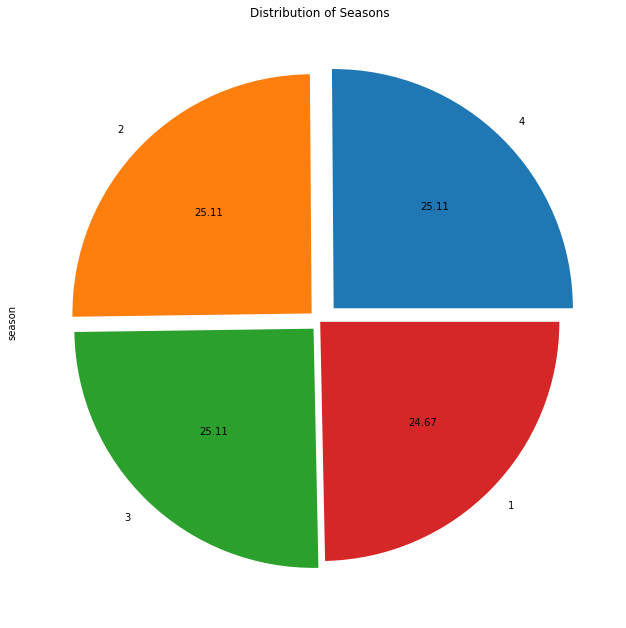

In [64]:
season=df.season.value_counts(normalize=True)*100
plt.figure(figsize=(15,11))
season.plot(kind='pie',autopct='%.2f',explode=(0.08,0.05,0.04,0),title='Distribution of Seasons')

In [65]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<AxesSubplot:>

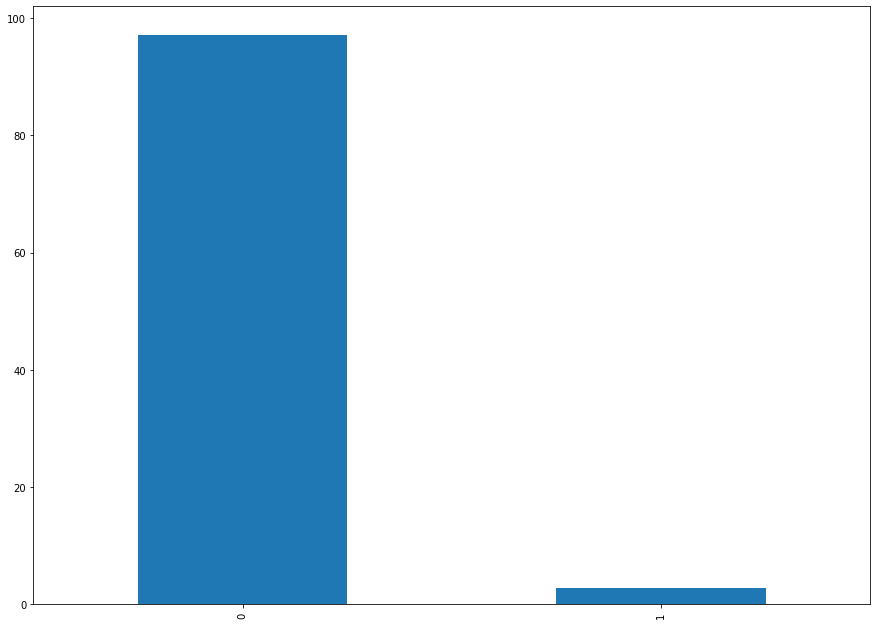

In [66]:
hol=df.holiday.value_counts(normalize=True)*100
plt.figure(figsize=(15,11))
hol.plot(kind='bar')

<AxesSubplot:title={'center':'Distribution of Holidays'}, ylabel='holiday'>

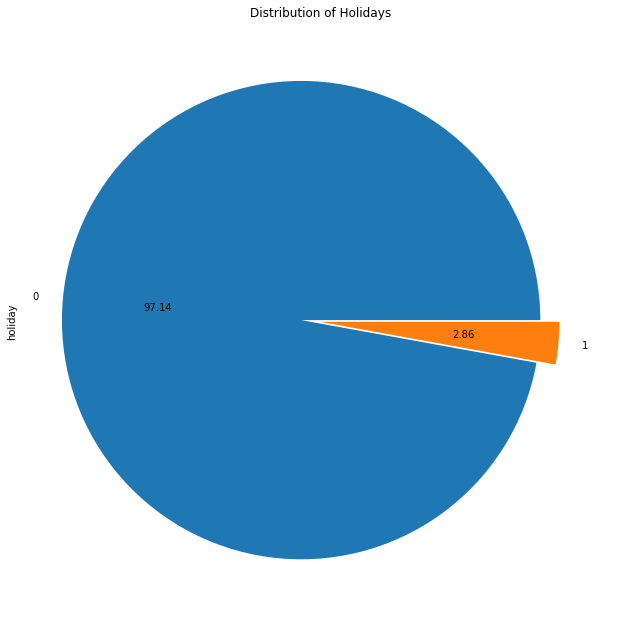

In [68]:

plt.figure(figsize=(15,11))
hol.plot(kind='pie',autopct='%.2f',explode=(0.08,0),title='Distribution of Holidays')

In [70]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:>

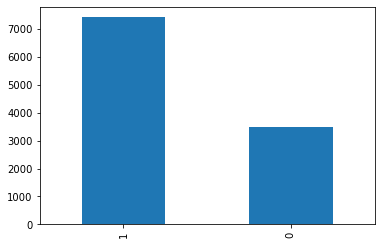

In [72]:
df.workingday.value_counts().plot(kind='bar')

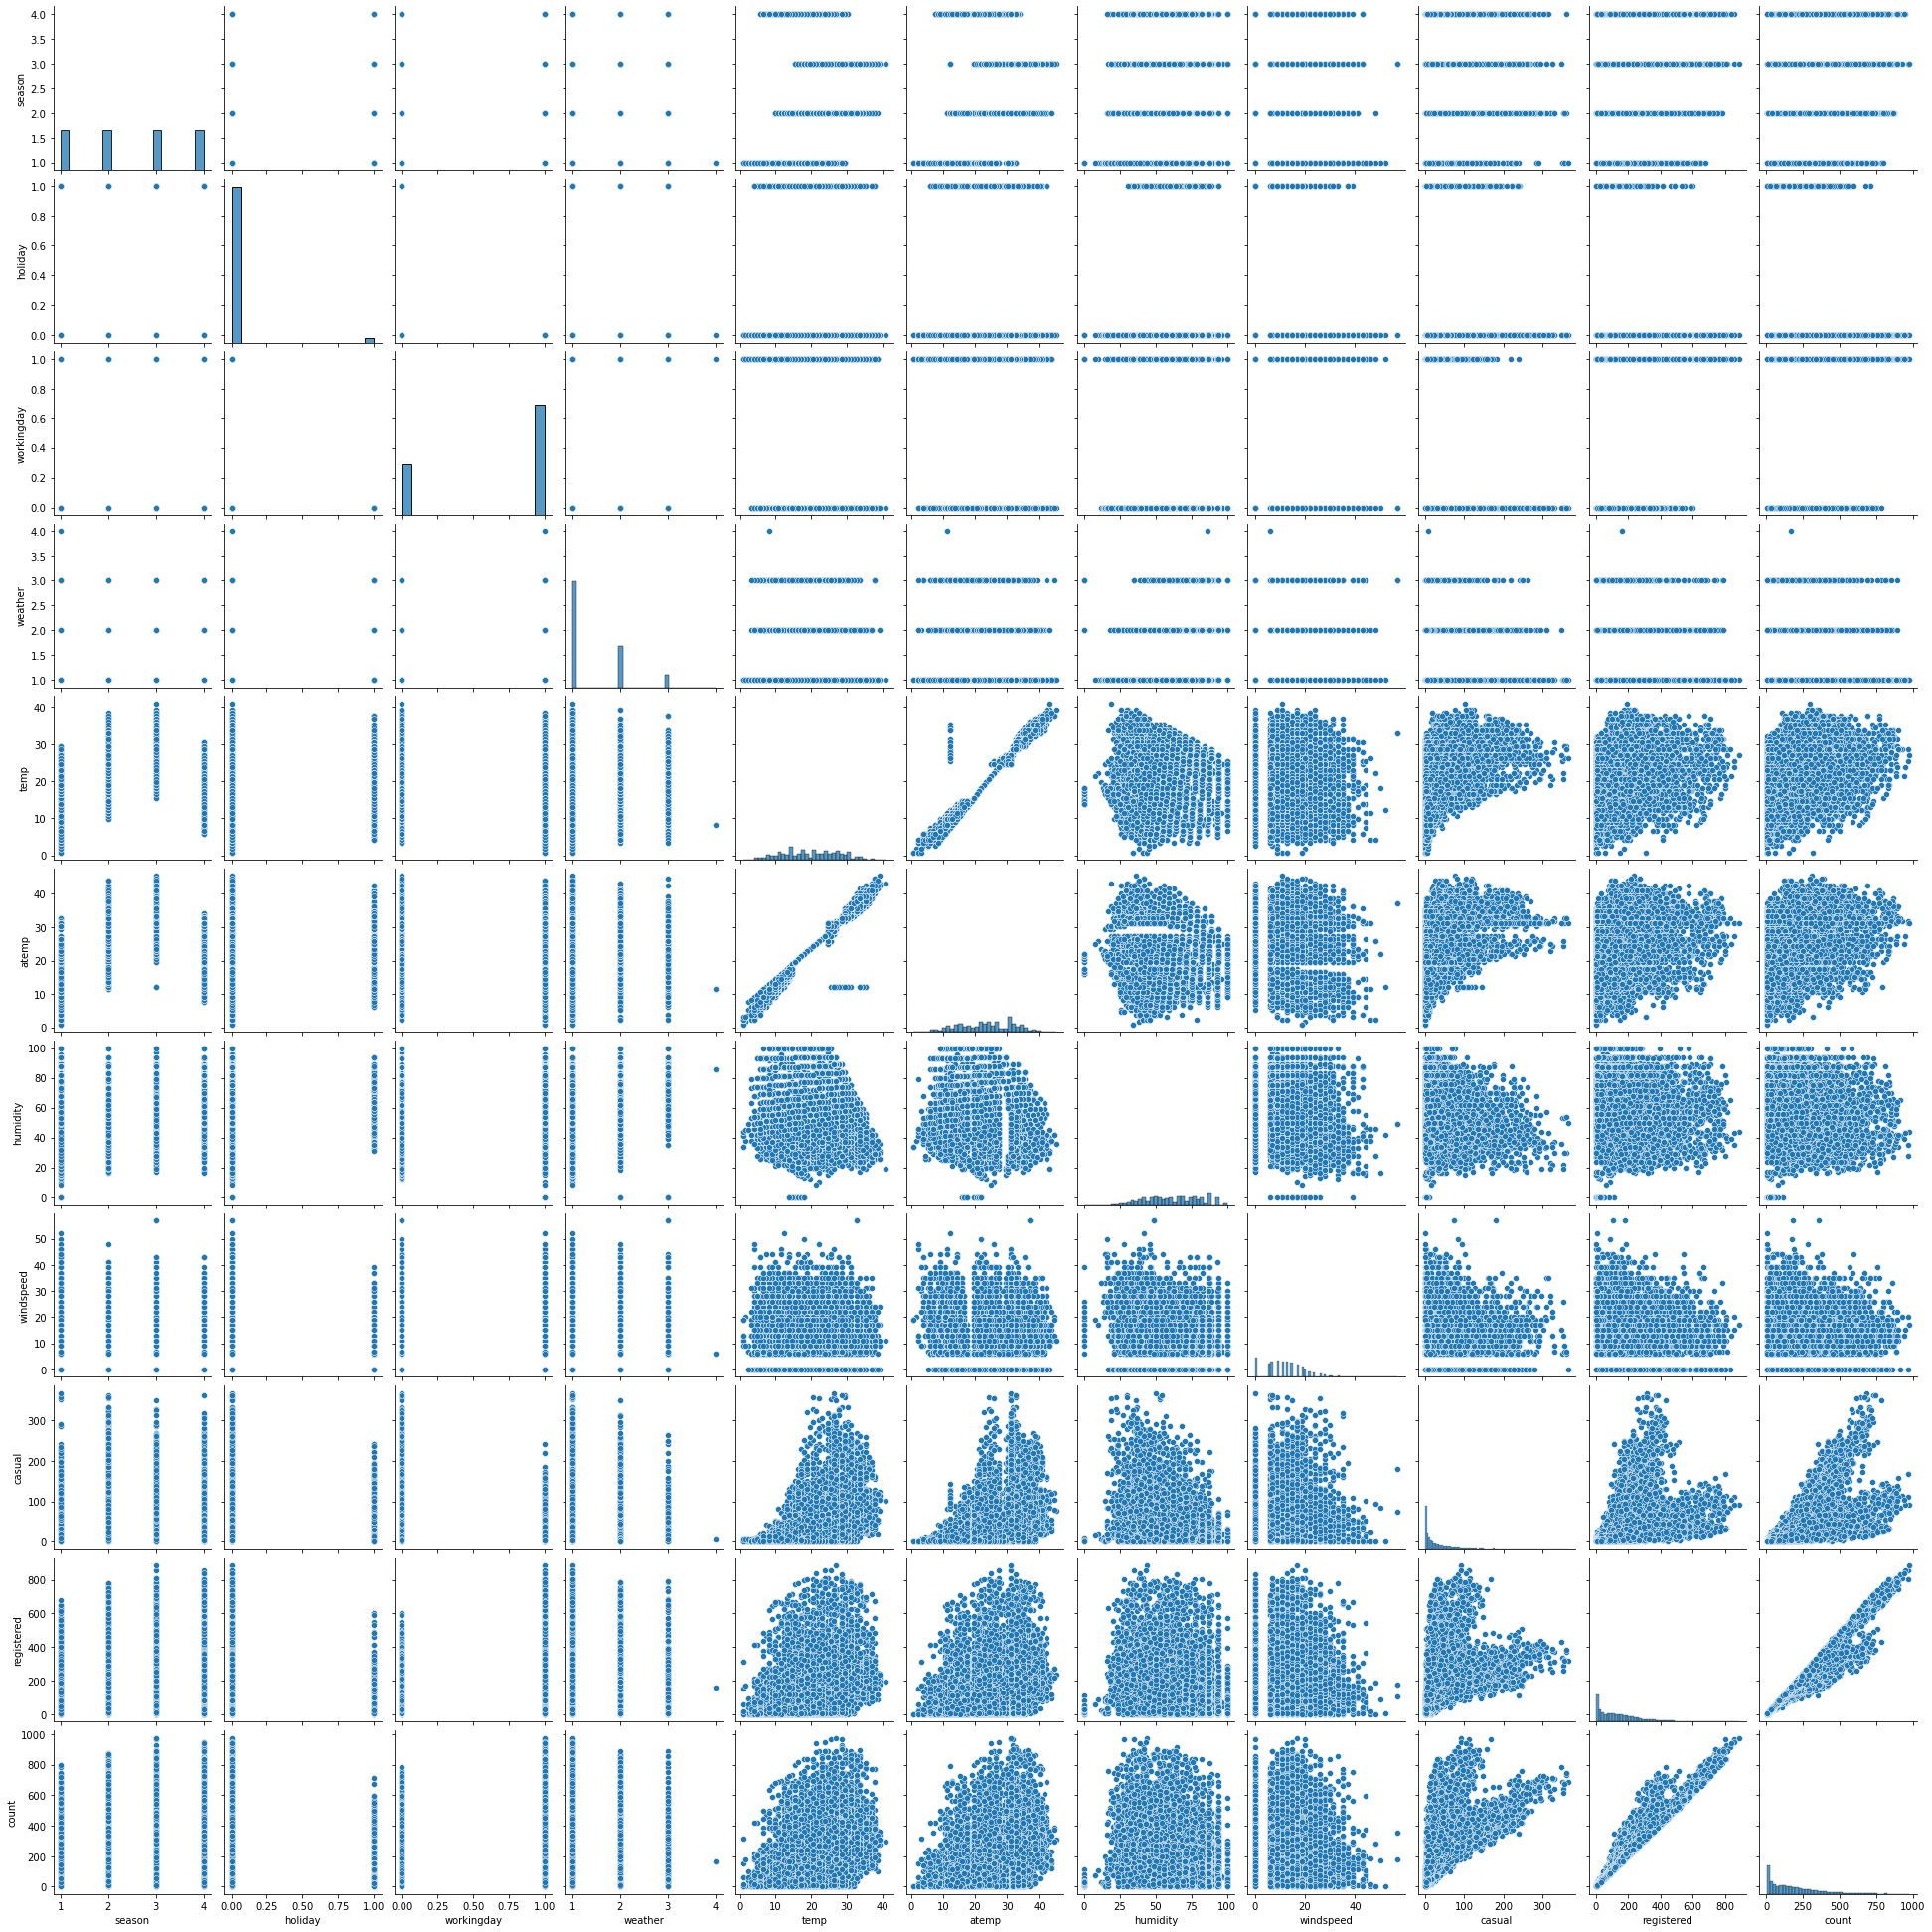

In [69]:
sns.pairplot(data=df)


## Univariate Analysis

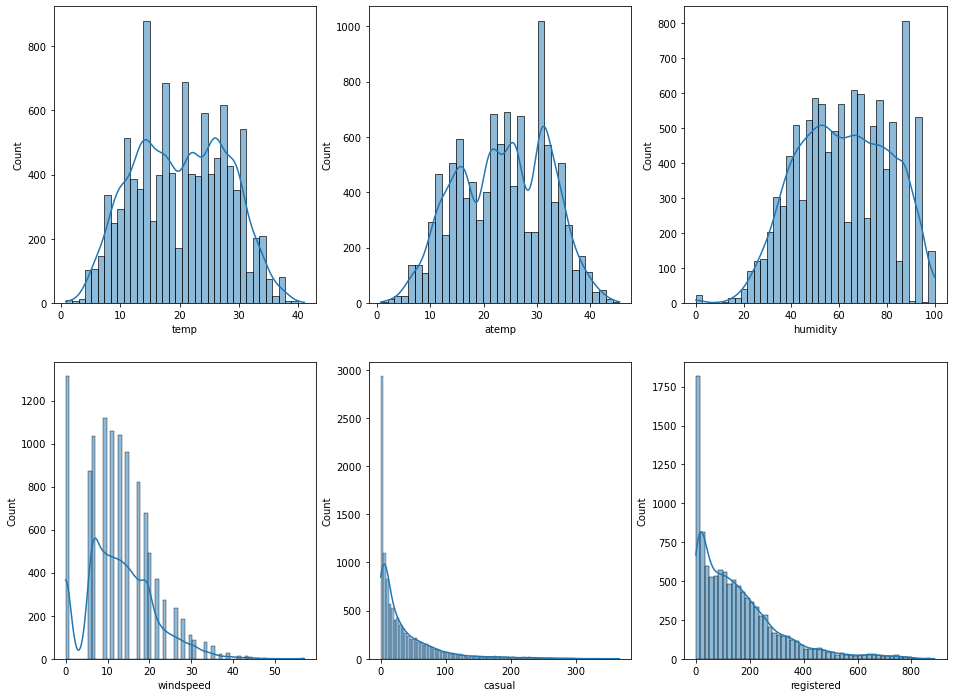

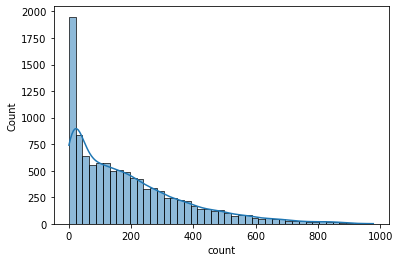

In [51]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(df[num_cols[-1]], kde=True) 
plt.show()

* casual, registered and count somewhat looks like Log Normal Distrinution
* temp, atemp and humidity looks like they follows the Normal Distribution
* windspeed follows the binomial distribution

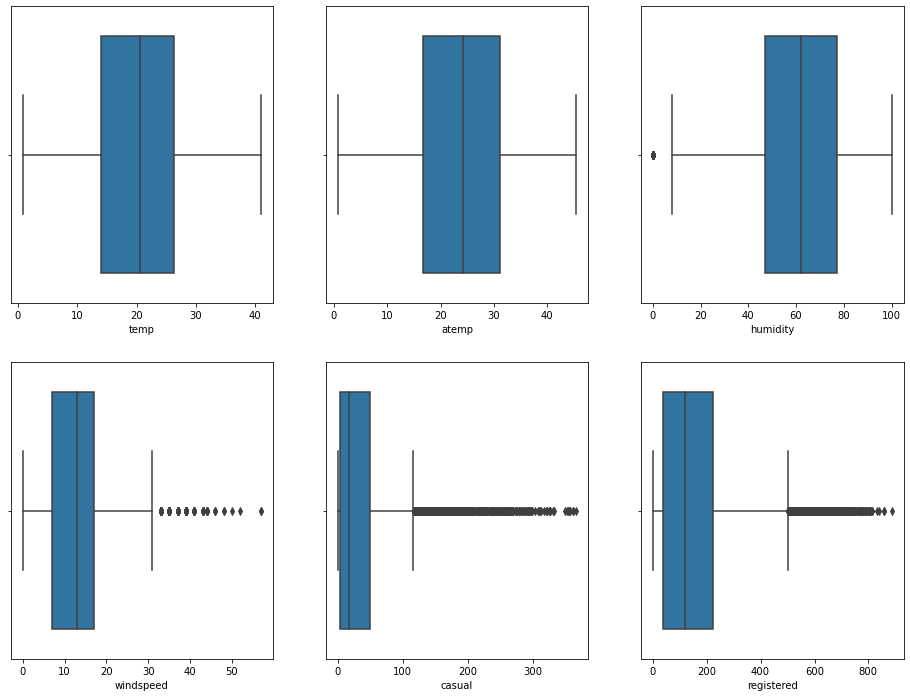

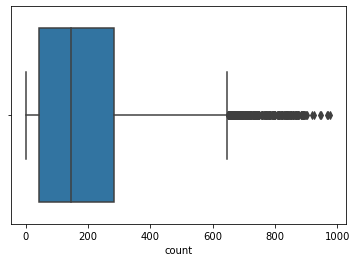

In [52]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]]) 
plt.show()

Looks like humidity, casual, registered and count have outliers in the data.

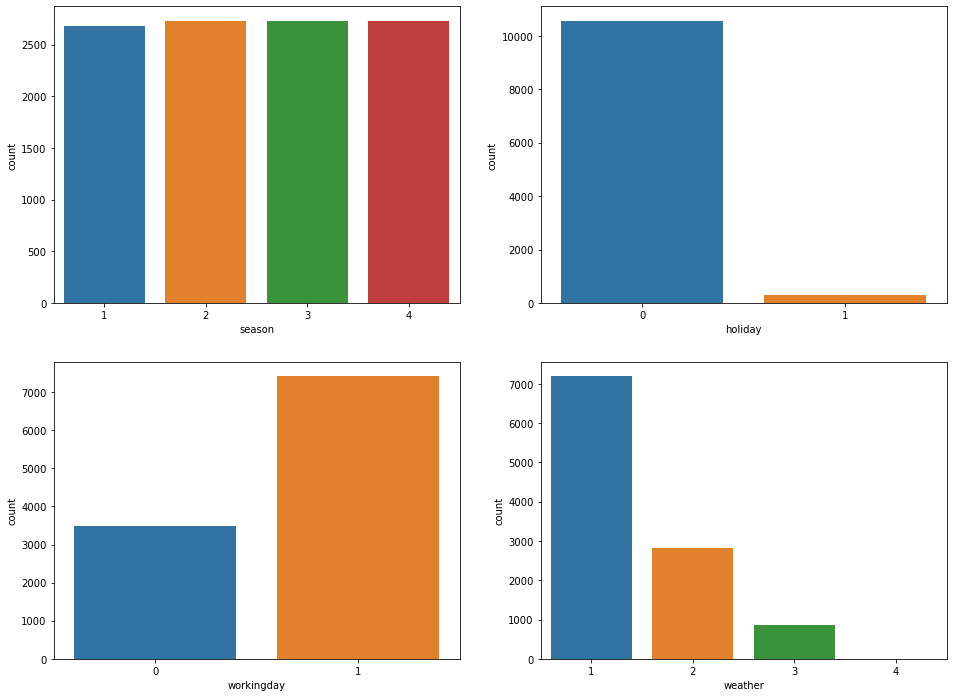

In [53]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy.

## Bi-variate Analysis

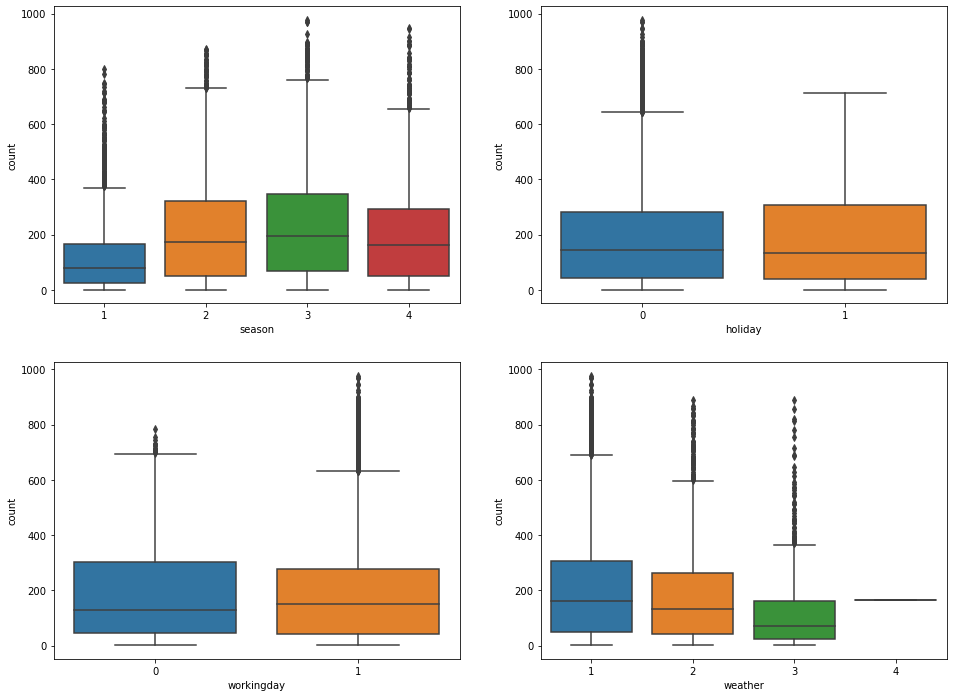

In [54]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented

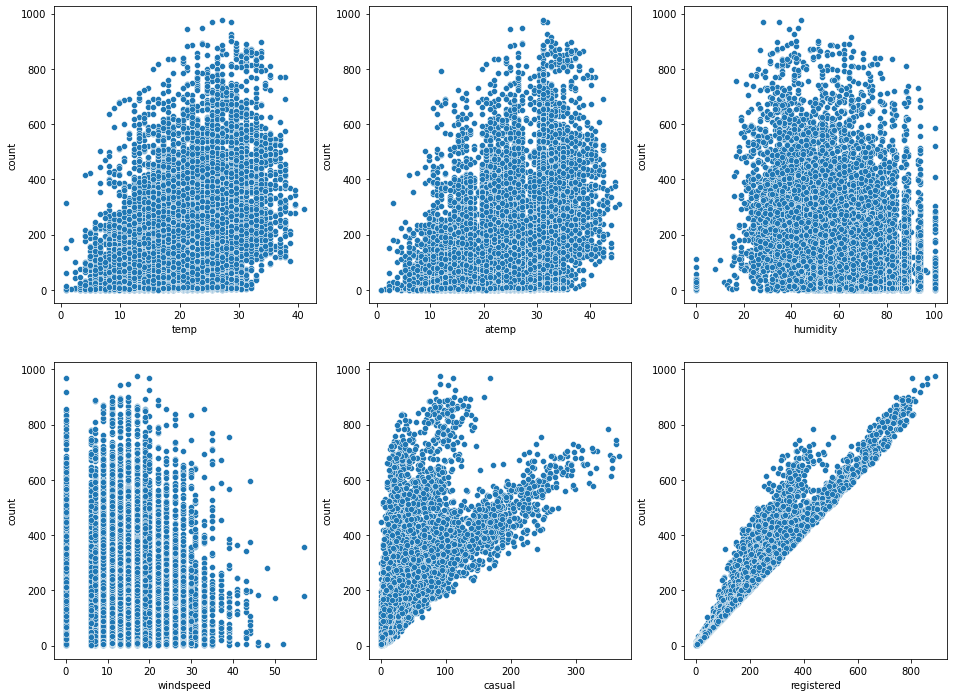

In [55]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

In [73]:
# Dependance of weather on totel user count

x1=df.groupby('weather')['count'].sum().reset_index()
x1

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [74]:
y1=df.groupby('weather')['count'].mean().reset_index()
y1

,weather,count
0,1,205.236791
1,2,178.955540
2,3,118.846333
3,4,164.000000


<AxesSubplot:xlabel='weather', ylabel='count'>

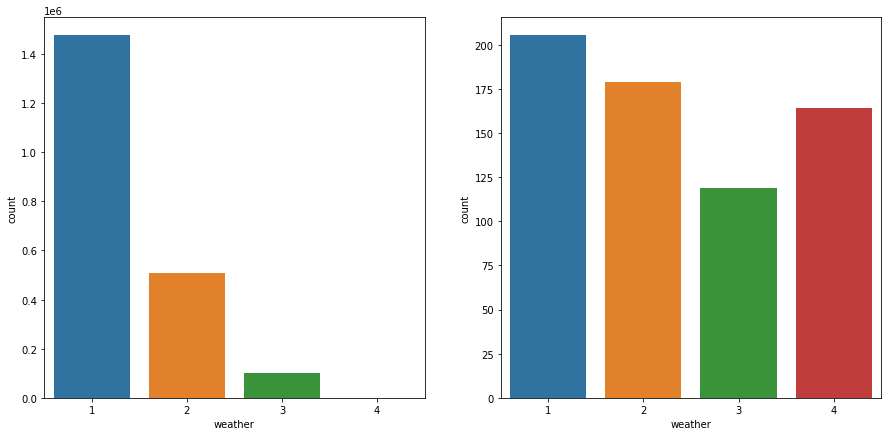

In [75]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='weather',y='count',data=x1)
plt.subplot(122)
sns.barplot(x='weather',y='count',data=y1)

In [76]:
#Dependance of season on totel user count
x1=df.groupby('season')['count'].sum().reset_index()
x1

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [77]:
y1=df.groupby('season')['count'].mean().reset_index()
y1

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


Text(0.5, 1.0, 'mean of users')

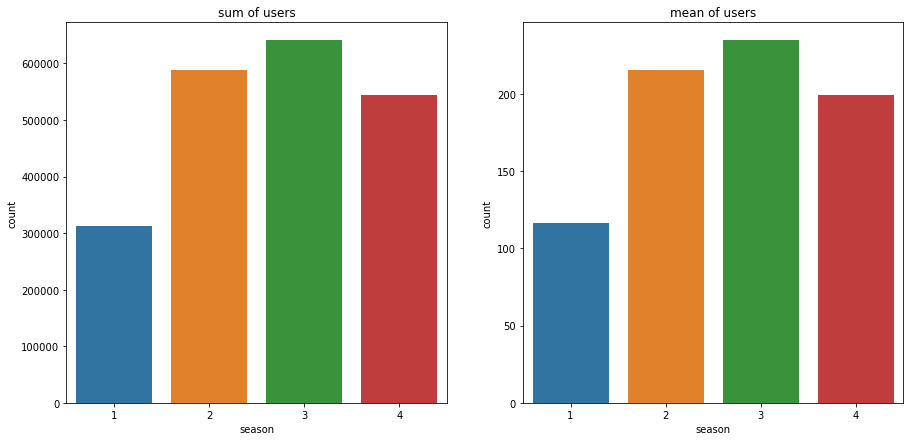

In [78]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.barplot(x='season',y='count',data=y1)
plt.title('mean of users')

In [80]:
#Dependance of temp on totel user count
x1=df.groupby('temp')['count'].sum().reset_index()
x1.head()

,temp,count
0,0.82,544
1,1.64,183
2,2.46,215
3,3.28,212
4,4.10,2212


In [81]:
y1=df.groupby('temp')['count'].mean().reset_index()
y1.head()

,temp,count
0,0.82,77.714286
1,1.64,91.500000
2,2.46,43.000000
3,3.28,19.272727
4,4.10,50.272727


Text(0.5, 1.0, 'mean of users')

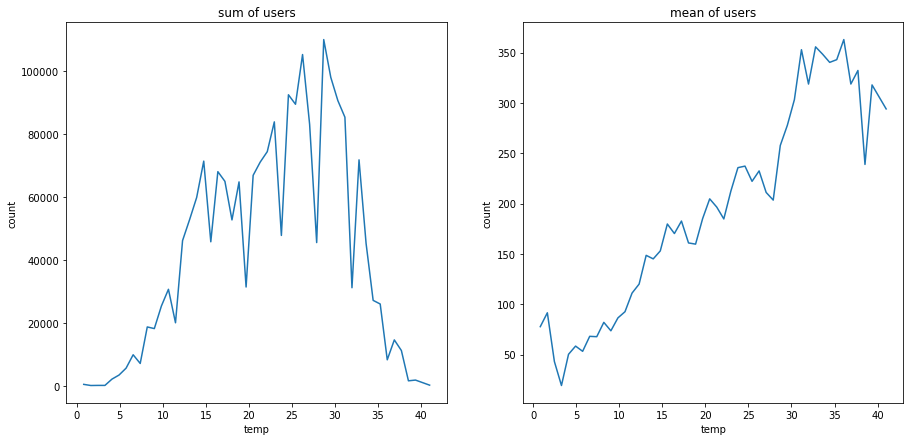

In [82]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='temp',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='temp',y='count',data=y1)
plt.title('mean of users')

From the above plot we can see that at lower temprature no.of users are very low .most of the users are in the temp range of 25 to 40 .There is a gradual increse of no of users with increse in temprature

In [84]:
#Dependance of atemp on totel user count
x1=df.groupby('atemp')['count'].sum().reset_index()
x1.head()

,atemp,count
0,0.760,2
1,1.515,3
2,2.275,266
3,3.030,576
4,3.790,625


In [85]:
y1=df.groupby('atemp')['count'].mean().reset_index()
y1.head()

,atemp,count
0,0.760,1.000000
1,1.515,3.000000
2,2.275,38.000000
3,3.030,82.285714
4,3.790,39.062500


Text(0.5, 1.0, 'mean of users')

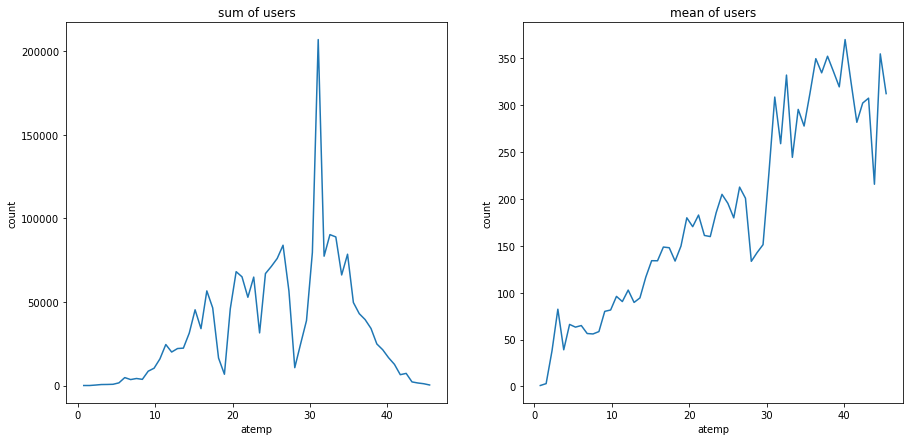

In [86]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='atemp',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='atemp',y='count',data=y1)
plt.title('mean of users')

From the above plot we can see that at lower atemprature no.of users are very low .most of the users are in the atemp range of 30 to 40 .There is a gradual increse of no of users with increse in temprature

In [87]:
#Adding new features like year,month,day from date time column

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['day_name'] = df['datetime'].dt.day_name()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,1,Saturday


In [89]:
#No of user count in each weekdays
x1=df.groupby('day_name')['count'].mean().to_frame('mean').reset_index()
x1.head()

,day_name,mean
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201


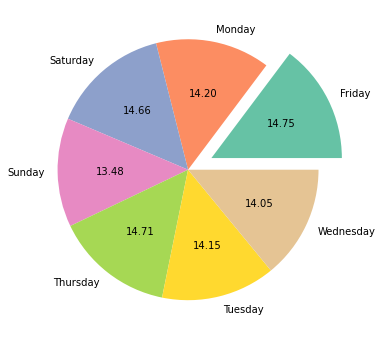

In [90]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=x1, x=x1['mean'], colors=palette_color, labels=x1['day_name'], explode=(0.2,0,0,0,0,0,0), autopct='%.2f')
plt.show()

* We can see that almost every day no.of users are same. Most and leat mean users are in respective days are friday and sunday

**No of user count in each month**

In [92]:
df.groupby('month')['count'].mean().to_frame('mean').reset_index()

,month,mean
0,April,184.160616
1,August,234.118421
2,December,175.614035
3,February,110.003330
4,January,90.366516
5,July,235.325658
6,June,242.031798
7,March,148.169811
8,May,219.459430
9,November,193.677278


<AxesSubplot:xlabel='month'>

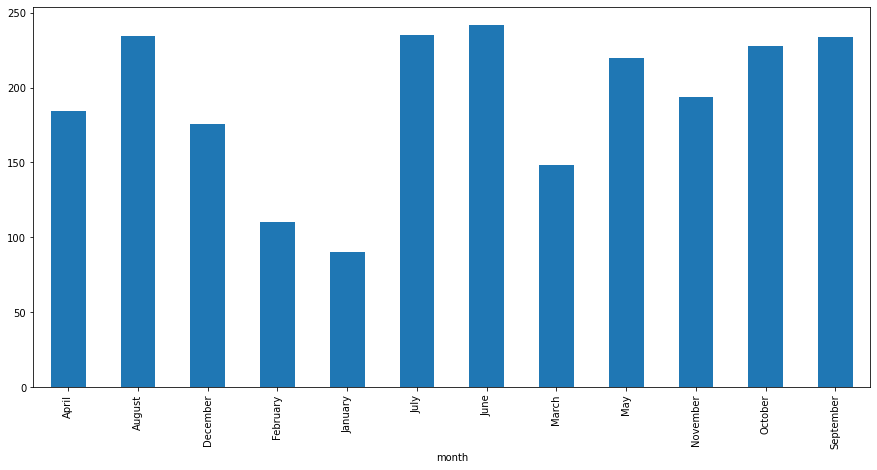

In [94]:
plt.figure(figsize=(15,7))
df.groupby('month')['count'].mean().plot(kind='bar')

From the above barplot we can se that *june,july and august* month are the most bike using months *Januery, february* are the least

**No.of users across every season in working days**

<AxesSubplot:xlabel='season', ylabel='count'>

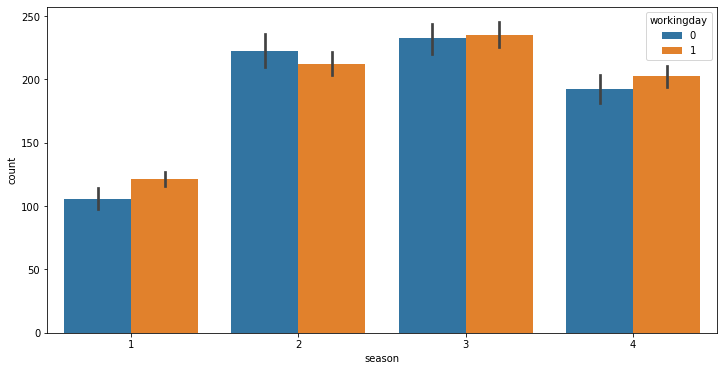

In [96]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y='count',x='season',hue='workingday')

We can see that season 1,3,4 working days have most number of users. In Season 2 holidays have most number of users

**No.of users across every season in diffrent year**

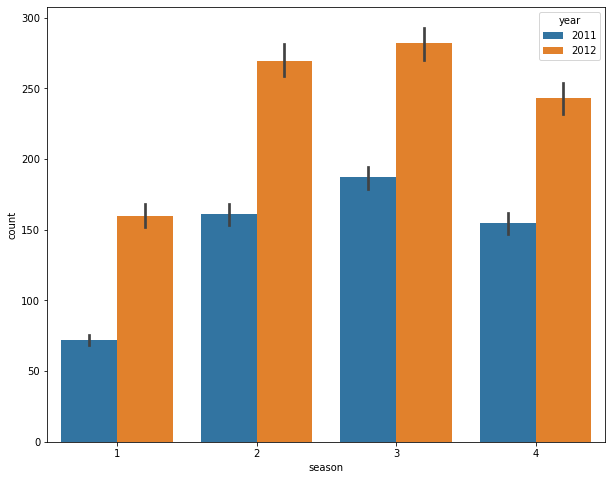

In [99]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='year',data=df)
plt.show()

We can see that in every season with increse in year number of users are incresing. In season 1 almost double the users compare to previous year

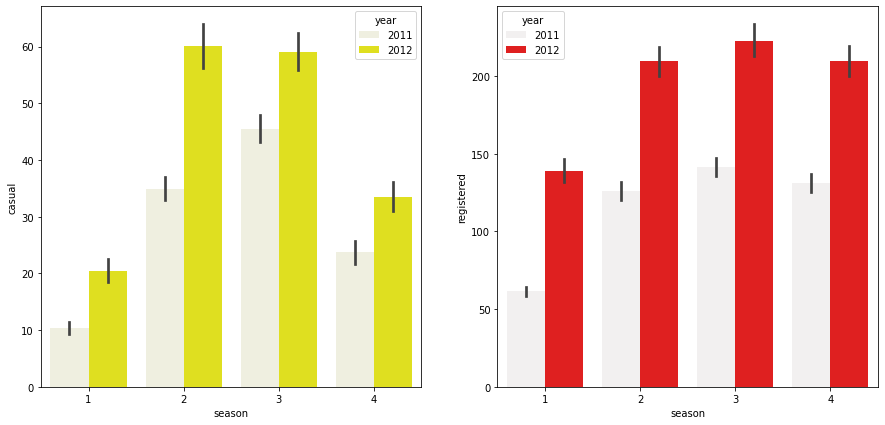

In [101]:
#No.of users across every season in casual and registered users

plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='casual',hue='year',data=df,color='yellow')
plt.subplot(122)
sns.barplot(x='season',y='registered',hue='year',data=df,color='red')
plt.show()

**No.of users varies across diffrent month in each season**

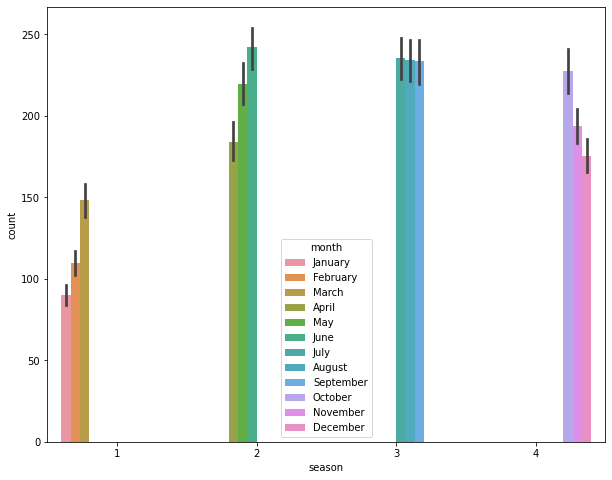

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='month',data=df)
plt.show()

In [56]:
# understanding the correlation between count and numerical variables 
df.corr()['count']

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

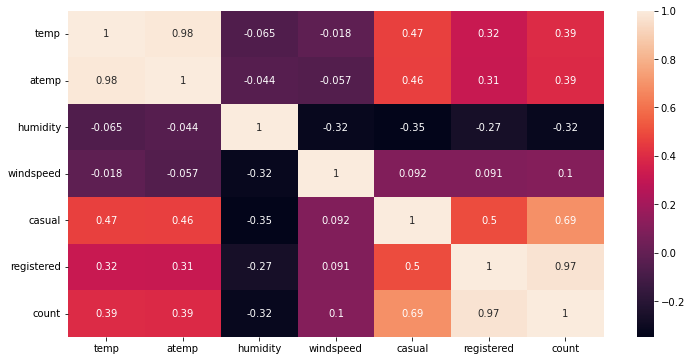

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Hypothesis Testing - 1

* Null Hypothesis (H0): Weather is independent of the season

* Alternate Hypothesis (H1): Weather is not independent of the season

* Significance level (alpha): 0.05

We will use **chi-square test** to test hypyothesis defined above.

In [58]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [59]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [60]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


### Hypothesis Testing - 2

* Null Hypothesis: Working day has no effect on the number of cycles being rented.

* Alternate Hypothesis: Working day has effect on the number of cycles being rented.

* Significance level (alpha): 0.05

We will use the **2-Sample T-Test** to test the hypothess defined above



In [61]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [62]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

### Hypothesis Testing - 3


* Null Hypothesis: Number of cycles rented is similar in different weather and season.

* Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

* Significance level (alpha): 0.05

Here, we will use the **ANOVA** to test the hypothess defined above

In [63]:
# defining the data groups for the ANOVA

gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

### Insights

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

## Recommendations
* In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temprature is less than 10 or in very cold days, company should have less bikes.
* Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.